
<br />
<center>
    <img src="images/f8c9ef2d942631ef439e0409bd0dabd1.jpg" width=400 height=100 />
</center>


# Importing all the required dependencies

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import nltk
import re
from nltk.book import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob, Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# EXPLORING IBM WATSON

REFERENCE SITE - Shilpibhattacharyya. “Shilpibhattacharyya/Friends_Analysis.” GitHub, 25 Oct. 2019, https://github.com/shilpibhattacharyya/Friends_Analysis.

While exploring about NLP we came across the IBM WATSON. We found emotion analysis on above mentioned URL. Performing the techniques to anyalize.

In [2]:
"""Using if and elif looping we are storing the dialogue in the characters name"""
friends_chars={} 
Rachel=''
Ross=''
Joey=''
Chandler=''
Phoebe=''
Monica=''
with open("data/all.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Rachel:'):
            Rachel=Rachel+' '+(line[8:])
        elif line.startswith('Ross:'):
            Ross=Ross+' '+(line[6:])
        elif line.startswith('Monica:'):
            Monica=Monica+' '+(line[8:])
        elif line.startswith('Chandler:'):
            Chandler=Chandler+' '+(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe=Phoebe+' '+(line[8:])
        if line.startswith('Joey:'):
            Joey=Joey+' '+(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey

In [3]:
import nltk
import ssl 
"""SSL is used for creating a secured seesion for authentication"""
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Data Preprocessiong

Lets remove the stopwords, new line character and tab character and get the data for further processing

In [4]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

    
stop_words = set(stopwords.words('english')) 

def clean_data(val):
    """This function returns clean data. This function will take data from open file pointers and drop new line and tab characters.
    Convert all the characters to lowercase to minimize the vocabulary and removes all the english stop words"""
    #remove new line and tab characters
    val = val.strip('\\n') 
    val = val.strip('\\t')
    # replacing new line and tab characters with white spaces 
    val = val.replace('\\n','')
    val = val.replace('\\t','')
    word_tokens = word_tokenize(str(val).lower().strip('[]') )
    #filtering sentences with stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return list(filtered_sentence)
    



In [5]:
def plotwordcloud(word):
    """This function will spot word frequencies for every character"""
    stopwords = set(STOPWORDS) 
    words = clean_data(str(word).strip('[]'))
    unique_string=(" ").join(words)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(unique_string) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

In [6]:
len(set(clean_data(str(friends_chars['RACHEL']).strip('[]')))) #unique word count

6125

In [7]:
#Finding unique words used by all the characters
rachel_corpus=list(set(clean_data(str(friends_chars['RACHEL']).strip('[]'))))
ross_corpus=list(set(clean_data(str(friends_chars['ROSS']).strip('[]'))))
mon_corpus=list(set(clean_data(str(friends_chars['MONICA']).strip('[]'))))
joe_corpus=list(set(clean_data(str(friends_chars['JOEY']).strip('[]'))))
phoebs_corpus=list(set(clean_data(str(friends_chars['PHOEBE']).strip('[]'))))
chandler_corpus=list(set(clean_data(str(friends_chars['CHANDLER']).strip('[]'))))

In [8]:
#top 50 words used by Rachel
list(set(clean_data(str(friends_chars['RACHEL']).strip('[]'))))[:50]

['manages',
 '6',
 'ooooh',
 'service',
 'hangover',
 'ladyfingers',
 'level',
 'anybody',
 'miniature',
 'm—i',
 'goody',
 'midterms',
 'unintelligible',
 'ok-dokey',
 'bing',
 "don't-i",
 'effective',
 'uhh',
 'se-x-u-ally',
 'ringing',
 'networks',
 'indian',
 'buffay',
 'tries',
 'rented',
 'sweetheart',
 'league',
 'caught',
 'officially',
 'single',
 'tell-tell',
 'at-at',
 'taste',
 'skin',
 'sends',
 'heaven',
 'cattle',
 'just…',
 'baby�s',
 'block',
 'skinny',
 'tire',
 'soother',
 'orange',
 'somone',
 'kill',
 '-ahhh',
 'supported',
 'school…',
 '35']

In [9]:
from nltk import FreqDist
#Using inbuilt function, FreqDist we are trying to find out frequency of each word
dist_rach=FreqDist(rachel_corpus)
dist_mon=FreqDist(mon_corpus)
dist_joe=FreqDist(joe_corpus)
dist_ross=FreqDist(ross_corpus)
dist_phoebs=FreqDist(phoebs_corpus)
dist_chandler=FreqDist(chandler_corpus)


In [10]:
len(dist_joe)

6239

In [11]:
#There are keys and values in each characters dictionary
vocab_rach=list(dist_rach.keys())
vocab_ross=list(dist_ross.keys())
vocab_mon=list(dist_mon.keys())
vocab_phoebs=list(dist_phoebs.keys())
vocab_joe=list(dist_joe.keys())
vocab_chandler=list(dist_chandler.keys())

In [12]:
vocab_rach[:10]

['manages',
 '6',
 'ooooh',
 'service',
 'hangover',
 'ladyfingers',
 'level',
 'anybody',
 'miniature',
 'm—i']

In [13]:

words_rach=[w for w in rachel_corpus if len(w)>3]# and dist_rach[w]>1]
words_mon=[w for w in mon_corpus if len(w)>3] #and dist_mon[w]>50]
words_ross=[w for w in ross_corpus if len(w)>3] #and dist_ross[w]>50]
words_phoebs=[w for w in phoebs_corpus if len(w)>3] #and dist_phoebs[w]>50]
words_joe=[w for w in joe_corpus if len(w)>3]# and dist_joe[w]>50]
words_chandler=[w for w in chandler_corpus if len(w)>3]# and dist_chandler[w]>50]

In [14]:
words_rach

['manages',
 'ooooh',
 'service',
 'hangover',
 'ladyfingers',
 'level',
 'anybody',
 'miniature',
 'goody',
 'midterms',
 'unintelligible',
 'ok-dokey',
 'bing',
 "don't-i",
 'effective',
 'se-x-u-ally',
 'ringing',
 'networks',
 'indian',
 'buffay',
 'tries',
 'rented',
 'sweetheart',
 'league',
 'caught',
 'officially',
 'single',
 'tell-tell',
 'at-at',
 'taste',
 'skin',
 'sends',
 'heaven',
 'cattle',
 'just…',
 'baby�s',
 'block',
 'skinny',
 'tire',
 'soother',
 'orange',
 'somone',
 'kill',
 '-ahhh',
 'supported',
 'school…',
 'oven',
 'barbados',
 'tuna',
 'gotten',
 'certain',
 'matthews',
 'payment',
 'planet',
 'bachelor',
 'routine',
 'chantal',
 'fish',
 'others',
 'rearranged',
 'evening',
 'starts',
 'i—that',
 'problem',
 'porsching',
 'bendall',
 'm—here',
 'anytime',
 'look…big',
 'and-and',
 'crust',
 'mild',
 'placing',
 'depends',
 'calves',
 'dates',
 'planted',
 'please…',
 'walk',
 'custom-make',
 'unexpected',
 'brother-in-law',
 'american',
 'workplace',
 's

# Normalization and stemming

In [15]:
import nltk
porter=nltk.PorterStemmer()
"""Used stemming for reducing the words to root forms"""
[porter.stem(t) for t in vocab_rach]
[porter.stem(t) for t in vocab_ross]
[porter.stem(t) for t in vocab_mon]
[porter.stem(t) for t in vocab_phoebs]
[porter.stem(t) for t in vocab_joe]
[porter.stem(t) for t in vocab_chandler]

['photographi',
 'awkwardli',
 '6',
 'ooooh',
 'servic',
 'multin',
 'bonnet',
 'peev',
 'level',
 'anybodi',
 'chelsea',
 'measur',
 'althea',
 'seat',
 'unintellig',
 'heartbreak',
 'bing',
 'ten-month',
 'ground',
 'indian',
 'ring',
 'uhh',
 'buffay',
 'tri',
 'sweetheart',
 'offici',
 'leagu',
 'caught',
 'singl',
 'fluoresc',
 'obituari',
 'slight',
 'tast',
 'send',
 'clinic',
 '—what',
 'heaven',
 'cattl',
 'just…',
 'god..',
 'skinni',
 'duti',
 'gladd',
 'inn',
 'orang',
 'kill',
 'capricorn',
 'meddler',
 'support',
 'kindergarten',
 'oven',
 'barbado',
 'saggi',
 'bat',
 'tasti',
 'calcul',
 'tuna',
 '007',
 'gotten',
 'pronounc',
 'certain',
 'packag',
 'planet',
 'routin',
 'bachelor',
 'fish',
 'other',
 'dresses…',
 'even',
 'start',
 'hunter',
 'problem',
 'donna',
 'sneaker',
 'anytim',
 'vampir',
 'co-work',
 'and-and',
 'mobil',
 'depend',
 'date',
 'distort',
 'walk',
 'vault',
 'guilt',
 'trap',
 'sprinkl',
 'chalk',
 'american',
 'forc',
 'summer',
 'ordinari',
 

# Lemmatization stemming, but all stems are valid words

In [16]:
WNLemma=nltk.WordNetLemmatizer()
"""return the base or dictionary form of a word"""
stem_freq_words_rach=[WNLemma.lemmatize(t) for t in words_rach]
stem_freq_words_ross=[WNLemma.lemmatize(t) for t in words_ross]
stem_freq_words_chandler=[WNLemma.lemmatize(t) for t in words_chandler]
stem_freq_words_mon=[WNLemma.lemmatize(t) for t in words_mon]
stem_freq_words_phoebs=[WNLemma.lemmatize(t) for t in words_phoebs]
stem_freq_words_joe=[WNLemma.lemmatize(t) for t in words_joe]

In [17]:
stem_freq_words_chandler

['photography',
 'awkwardly',
 'ooooh',
 'service',
 'multinational',
 'bonnet',
 'peeve',
 'level',
 'anybody',
 'chelsea',
 'measuring',
 'althea',
 'seat',
 'unintelligible',
 'heartbreaker',
 'bing',
 'ten-month',
 'grounded',
 'indian',
 'ringing',
 'buffay',
 'try',
 'sweetheart',
 'officially',
 'league',
 'caught',
 'single',
 'fluorescent',
 'obituary',
 'slight',
 'taste',
 'sends',
 'clinic',
 '—what',
 'heaven',
 'cattle',
 'just…',
 'god..',
 'skinny',
 'duty',
 'gladd',
 'orange',
 'kill',
 'capricorn',
 'meddler',
 'supported',
 'kindergarten',
 'oven',
 'barbados',
 'saggy',
 'tasty',
 'calculator',
 'tuna',
 'gotten',
 'pronounces',
 'certain',
 'package',
 'planet',
 'routine',
 'bachelor',
 'fish',
 'others',
 'dresses…',
 'evening',
 'start',
 'hunter',
 'problem',
 'donna',
 'sneaker',
 'anytime',
 'vampire',
 'co-worker',
 'and-and',
 'mobile',
 'depends',
 'date',
 'distorted',
 'walk',
 'vault',
 'guilt',
 'trap',
 'sprinkle',
 'chalk',
 'american',
 'force',
 '

In [18]:
"""Tagging the list of noun,pronoun,verbs,etc"""
nltk.pos_tag(vocab_rach)

[('manages', 'NNS'),
 ('6', 'CD'),
 ('ooooh', 'JJ'),
 ('service', 'NN'),
 ('hangover', 'NN'),
 ('ladyfingers', 'NNS'),
 ('level', 'VBP'),
 ('anybody', 'NN'),
 ('miniature', 'NN'),
 ('m—i', 'NN'),
 ('goody', 'NN'),
 ('midterms', 'NNS'),
 ('unintelligible', 'JJ'),
 ('ok-dokey', 'JJ'),
 ('bing', 'VBG'),
 ("don't-i", 'JJ'),
 ('effective', 'JJ'),
 ('uhh', 'JJ'),
 ('se-x-u-ally', 'RB'),
 ('ringing', 'VBG'),
 ('networks', 'NNS'),
 ('indian', 'JJ'),
 ('buffay', 'NN'),
 ('tries', 'NNS'),
 ('rented', 'VBD'),
 ('sweetheart', 'JJ'),
 ('league', 'NN'),
 ('caught', 'VBD'),
 ('officially', 'RB'),
 ('single', 'JJ'),
 ('tell-tell', 'JJ'),
 ('at-at', 'JJ'),
 ('taste', 'NN'),
 ('skin', 'NN'),
 ('sends', 'VBZ'),
 ('heaven', 'JJ'),
 ('cattle', 'NNS'),
 ('just…', 'JJ'),
 ('baby�s', 'JJ'),
 ('block', 'NN'),
 ('skinny', 'NN'),
 ('tire', 'NN'),
 ('soother', 'NN'),
 ('orange', 'NN'),
 ('somone', 'NN'),
 ('kill', 'NN'),
 ('-ahhh', 'NNP'),
 ('supported', 'VBD'),
 ('school…', 'JJ'),
 ('35', 'CD'),
 ('oven', 'RB'),

In [19]:
"""Appending words into character's(RACHEL)strings """
s_rachel=""
for w in stem_freq_words_rach:
   s_rachel=s_rachel+' '+w

s_rachel

" manages ooooh service hangover ladyfinger level anybody miniature goody midterm unintelligible ok-dokey bing don't-i effective se-x-u-ally ringing network indian buffay try rented sweetheart league caught officially single tell-tell at-at taste skin sends heaven cattle just… baby�s block skinny tire soother orange somone kill -ahhh supported school… oven barbados tuna gotten certain matthew payment planet bachelor routine chantal fish others rearranged evening start i—that problem porsching bendall m—here anytime look…big and-and crust mild placing depends calf date planted please… walk custom-make unexpected brother-in-law american workplace summer street telephone hamburger michelle order direction dollar fat-free irritating labor give disgustedly remote state outside business soda find headset 's'like evicted pat beggin satan music… ikea trip prom dress… go pretzel fresh misunderstanding taking revoir benefitty animal suction recently time jones choked tacked yeah-eah-ha bookend d

In [20]:
"""Appending words into character's(ROSS)strings """
s_ross=""
for w in stem_freq_words_ross:
   s_ross=s_ross+' '+w

s_ross

" evolutionary manages prize geller-willick-bunch tighter starving kilt service ooooh there… pant-suit freak…out peeve anybody level althea tied shush-shush-shhst seat funnily bit…hit gigantosaurus i-it struggle bing effective indian minding buffay try sweetheart league caught w-w-w-w-wait single —now slight taste skin sends —what heaven just… bar… god.. baby�s block orange eighty kill whitney misshapen kindergarten surfing school… a-actually beep oven barbados tuna gotten certain package anita oke-dokey bachelor routine fish tattletale memorize others rearranged evening bow start back—stop problem in—no rudolph anytime fajitas and-and very…very depending stretching depends date ah-huh please… walk guilt disagreement uh—well implant brother-in-law american chalk summer street yumm chose clunkers michelle order over. whiney architecture direction puzzle—beer dollar labor give beeper disgustedly washer remote state outside business arrives death-cab find evicted pat impression… *enough* 

In [21]:
"""Appending words into character's(PHOEB)strings """
s_phoebs=""
for w in stem_freq_words_phoebs:
   s_phoebs=s_phoebs+' '+w

s_phoebs

" manages prize starving proceed ooooh service eat… could— anybody level miniature tied seat blankly goat unintelligible bing don't-i indian guest buffay try sweetheart league caught performance single at-at freud taste skin just… block tire orange kill whitney homosexual oven barbados gotten pronounces certain one-year package marker creative planet bachelor fish others evening semi-finals start problem hexadrin anytime ah-hah abby co-worker and-and mobile segmented stretching depends date veil walk vault unexpected err-err trap chalk summer trois rise ordinary street cursed telephone clunkers michelle frère order direction dollar labor give purr beeper disgustedly state remote outside unyielding business sunny find pat satan victim trip ikea prom go taking bun revoir animal pleased donate vent recently time spends ..y'know laaaaaid musket devonian paradise us chase there's—no refilled you�ll applying prize chandler f.y.i lie belgian step artistic left sour stood psycho widow roughy p

In [22]:
"""Appending words into character's(JOE)strings """
s_joe=""
for w in stem_freq_words_joe:
   s_joe=s_joe+' '+w


In [23]:
"""Appending words into character's(CHANDLER)strings """
s_chandler=""
for w in stem_freq_words_chandler:
   s_chandler=s_chandler+' '+w

In [24]:
"""Appending words into character's(MONICA)strings """
s_mon=""
for w in stem_freq_words_mon:
   s_mon=s_mon+' '+w



It's an open conversation. Everyone talks to everbody else.
They all talk in a similar way -mingle well with each other

IBM Waston is a company which specializes in machine learning tools and tech that can be used for predciation and analysis. 
For instance NaturalLanguageUnderstandingV1is service offered by imb watson that can be used to process the natural language and help to infer sentiments

In [25]:
dicti={}
"""Establishing connection with Ibm watson using autentication key"""
authenticator = IAMAuthenticator('7iWlOedWeTpgREu12do8yDjjxHC3WiNrc593r4sAjrdC')
natural_language_understanding = NaturalLanguageUnderstandingV1(
   authenticator=authenticator,
    version='2019-07-25')
natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api')                           

#natural_language_understanding = NaturalLanguageUnderstandingV1(
#        iam_apikey='7iWlOedWeTpgREu12do8yDjjxHC3WiNrc593r4sAjrdC',
#        version='2019-07-25',
#        url='https://gateway.watsonplatform.net/natural-language-understanding/api'
#    )
##rachel

response = natural_language_understanding.analyze(
    text=s_rachel,
    features=Features(emotion=EmotionOptions())).get_result()
print("Rachel")
print("======================================")
dicti["Rachel"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#print(json.dumps(response, indent=2))

##ross
response = natural_language_understanding.analyze(
    text=s_ross,
    features=Features(emotion=EmotionOptions())).get_result()
print("Ross")
print("======================================")
dicti["Ross"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

##monica
response = natural_language_understanding.analyze(
    text=s_mon,
    features=Features(emotion=EmotionOptions())).get_result()
print("Monica")
dicti["Monica"]=response["emotion"]["document"]["emotion"]

print("======================================")
print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

##phoebe
response = natural_language_understanding.analyze(
    text=s_phoebs,
    features=Features(emotion=EmotionOptions())).get_result()
print("Phoebe")
dicti["Phoebe"]=response["emotion"]["document"]["emotion"]

print("======================================")
print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#chandler
response = natural_language_understanding.analyze(
    text=s_chandler,
    features=Features(emotion=EmotionOptions())).get_result()
print("Chandler")
print("======================================")
dicti["Chandler"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))

#joey
response = natural_language_understanding.analyze(
    text=s_joe,
    features=Features(emotion=EmotionOptions())).get_result()

print("Joey")
print("======================================")
dicti["Joey"]=response["emotion"]["document"]["emotion"]

print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))
print(json.dumps(dicti, indent=2))







Rachel
{
  "sadness": 0.583222,
  "joy": 0.53574,
  "fear": 0.190715,
  "disgust": 0.192063,
  "anger": 0.464632
}
Ross
{
  "sadness": 0.584524,
  "joy": 0.556635,
  "fear": 0.489273,
  "disgust": 0.170625,
  "anger": 0.486127
}
Monica
{
  "sadness": 0.555548,
  "joy": 0.561445,
  "fear": 0.170668,
  "disgust": 0.505524,
  "anger": 0.525118
}
Phoebe
{
  "sadness": 0.607249,
  "joy": 0.548441,
  "fear": 0.206467,
  "disgust": 0.173092,
  "anger": 0.50313
}
Chandler
{
  "sadness": 0.593656,
  "joy": 0.549506,
  "fear": 0.164102,
  "disgust": 0.50241,
  "anger": 0.547431
}
Joey
{
  "sadness": 0.582791,
  "joy": 0.595574,
  "fear": 0.17654,
  "disgust": 0.490944,
  "anger": 0.201353
}
{
  "Rachel": {
    "sadness": 0.583222,
    "joy": 0.53574,
    "fear": 0.190715,
    "disgust": 0.192063,
    "anger": 0.464632
  },
  "Ross": {
    "sadness": 0.584524,
    "joy": 0.556635,
    "fear": 0.489273,
    "disgust": 0.170625,
    "anger": 0.486127
  },
  "Monica": {
    "sadness": 0.555548,
    

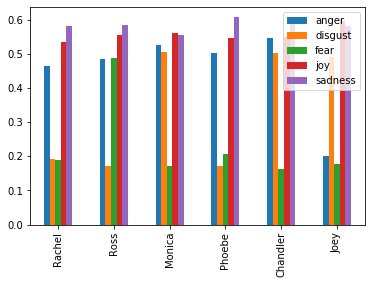

In [26]:
df = pd.DataFrame(dicti)

df.transpose().plot(kind='bar')

In [27]:
df.head() class grading where to do??? because lot of us are not  grading will u plz ask after this to everyone if they are doing or not?

,Rachel,Ross,Monica,Phoebe,Chandler,Joey
anger,0.464632,0.486127,0.525118,0.503130,0.547431,0.201353
disgust,0.192063,0.170625,0.505524,0.173092,0.502410,0.490944
fear,0.190715,0.489273,0.170668,0.206467,0.164102,0.176540
joy,0.535740,0.556635,0.561445,0.548441,0.549506,0.595574
sadness,0.583222,0.584524,0.555548,0.607249,0.593656,0.582791


In [28]:
"""Finding happiness qoutient of each character """
happy_quotient_Rach=df.Rachel.joy/df['Rachel'].sum()
happy_quotient_Ross=df.Ross.joy/df['Ross'].sum()
happy_quotient_Joey=df.Joey.joy/df['Joey'].sum()
happy_quotient_Monica=df.Monica.joy/df['Monica'].sum()
happy_quotient_Phoebe=df.Phoebe.joy/df['Phoebe'].sum()
happy_quotient_Chandler=df.Chandler.joy/df['Chandler'].sum()


In [29]:
"""Finding sadness qoutient of each character """
sadness_quotient_Rach=df.Rachel.sadness/df['Rachel'].sum()
sadness_quotient_Ross=df.Ross.sadness/df['Ross'].sum()
sadness_quotient_Joey=df.Joey.sadness/df['Joey'].sum()
sadness_quotient_Monica=df.Monica.sadness/df['Monica'].sum()
sadness_quotient_Phoebe=df.Phoebe.sadness/df['Phoebe'].sum()
sadness_quotient_Chandler=df.Chandler.sadness/df['Chandler'].sum()

In [30]:
"""Finding Disgusting qoutient of each character """
Disgusting_quotient_Rach=df.Rachel.disgust/df['Rachel'].sum()
Disgusting_quotient_Ross=df.Ross.disgust/df['Ross'].sum()
Disgusting_quotient_Joey=df.Joey.disgust/df['Joey'].sum()
Disgusting_quotient_Monica=df.Monica.disgust/df['Monica'].sum()
Disgusting_quotient_Phoebe=df.Phoebe.disgust/df['Phoebe'].sum()
Disgusting_quotient_Chandler=df.Chandler.disgust/df['Chandler'].sum()

In [31]:
"""Finding fear qoutient of each character """
Fear_quotient_Rach=df.Rachel.fear/df['Rachel'].sum()
Fear_quotient_Ross=df.Ross.fear/df['Ross'].sum()
Fear_quotient_Joey=df.Joey.fear/df['Joey'].sum()
Fear_quotient_Monica=df.Monica.fear/df['Monica'].sum()
Fear_quotient_Phoebe=df.Phoebe.fear/df['Phoebe'].sum()
Fear_quotient_Chandler=df.Chandler.fear/df['Chandler'].sum()

In [32]:
"""Finding anger qoutient of each character """
Anger_quotient_Rach=df.Rachel.anger/df['Rachel'].sum()
Anger_quotient_Ross=df.Ross.anger/df['Ross'].sum()
Anger_quotient_Joey=df.Joey.anger/df['Joey'].sum()
Anger_quotient_Monica=df.Monica.anger/df['Monica'].sum()
Anger_quotient_Phoebe=df.Phoebe.anger/df['Phoebe'].sum()
Anger_quotient_Chandler=df.Chandler.anger/df['Chandler'].sum()

# Scatter Plots

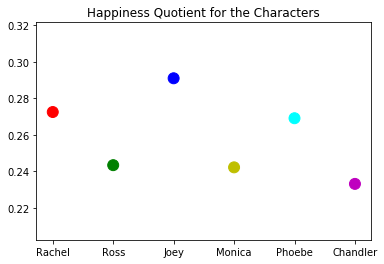

In [33]:

x_happy = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_happy = [happy_quotient_Rach,happy_quotient_Ross,happy_quotient_Joey,happy_quotient_Monica,happy_quotient_Phoebe,happy_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.scatter(x_happy,y_happy,s=120, c=colors)
plt.title('Happiness Quotient for the Characters')
plt.show()

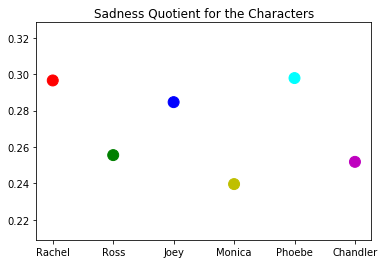

In [34]:
x_sad = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_sad = [sadness_quotient_Rach,sadness_quotient_Ross,sadness_quotient_Joey,sadness_quotient_Monica,sadness_quotient_Phoebe,sadness_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.scatter(x_sad,y_sad,s=120, c=colors)
plt.title('Sadness Quotient for the Characters')
plt.show()

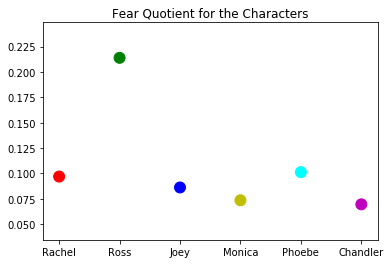

In [35]:
x_fear = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_fear = [Fear_quotient_Rach,Fear_quotient_Ross,Fear_quotient_Joey,Fear_quotient_Monica,Fear_quotient_Phoebe,Fear_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.scatter(x_fear,y_fear,s=120, c=colors)
plt.title('Fear Quotient for the Characters')
plt.show()

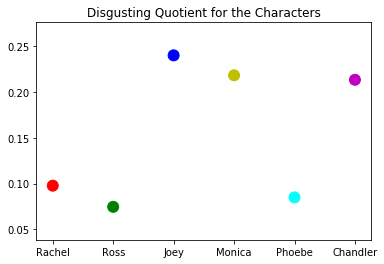

In [36]:
x_disgust = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_disgust = [Disgusting_quotient_Rach,Disgusting_quotient_Ross,Disgusting_quotient_Joey,Disgusting_quotient_Monica,Disgusting_quotient_Phoebe,Disgusting_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.scatter(x_disgust,y_disgust,s=120, c=colors)
plt.title('Disgusting Quotient for the Characters')
plt.show()

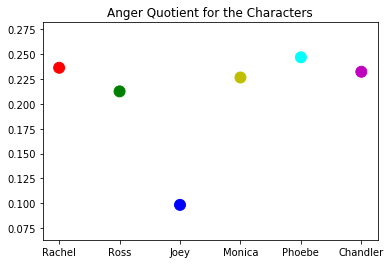

In [37]:
x_anger = ['Rachel','Ross','Joey','Monica','Phoebe','Chandler']
y_anger = [Anger_quotient_Rach,Anger_quotient_Ross,Anger_quotient_Joey,Anger_quotient_Monica,Anger_quotient_Phoebe,Anger_quotient_Chandler]
colors = ['r','g','b','y','cyan','m']
plt.scatter(x_anger,y_anger,s=120, c=colors)
plt.title('Anger Quotient for the Characters')
plt.show()

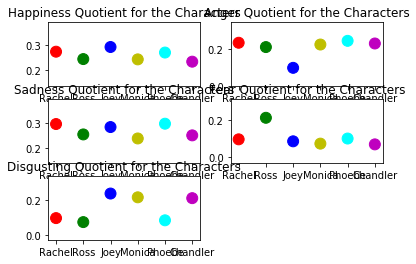

In [38]:
plt.subplot(3, 2, 1)
plt.scatter(x_happy,y_happy,s=120, c=colors)
plt.title('Happiness Quotient for the Characters')

plt.subplot(3, 2, 2)
plt.scatter(x_anger,y_anger,s=120, c=colors)
plt.title('Anger Quotient for the Characters')

plt.subplot(3, 2, 3)
plt.scatter(x_sad,y_sad,s=120, c=colors)
plt.title('Sadness Quotient for the Characters')

plt.subplot(3, 2, 4)
plt.scatter(x_fear,y_fear,s=120, c=colors)
plt.title('Fear Quotient for the Characters')

plt.subplot(3, 2, 5)
plt.scatter(x_disgust,y_disgust,s=120, c=colors)
plt.title('Disgusting Quotient for the Characters')


plt.show()

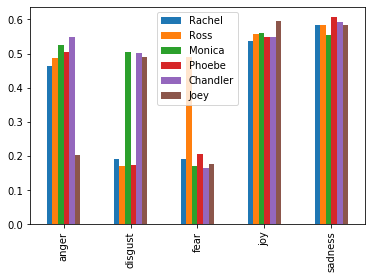

In [40]:
df.plot(kind='bar')
plt.show()

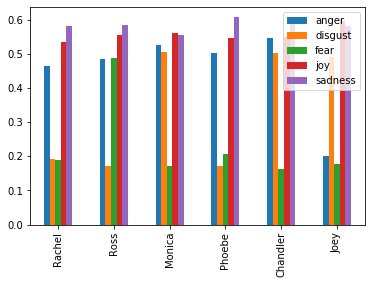

In [41]:
df.transpose().plot(kind='bar')
plt.show()

In [42]:
df1=df.transpose()
df1

,anger,disgust,fear,joy,sadness
Rachel,0.464632,0.192063,0.190715,0.535740,0.583222
Ross,0.486127,0.170625,0.489273,0.556635,0.584524
Monica,0.525118,0.505524,0.170668,0.561445,0.555548
Phoebe,0.503130,0.173092,0.206467,0.548441,0.607249
Chandler,0.547431,0.502410,0.164102,0.549506,0.593656
Joey,0.201353,0.490944,0.176540,0.595574,0.582791


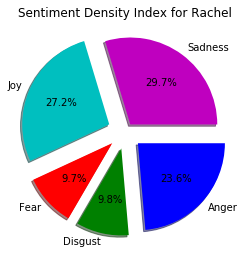

In [43]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.2, 0.2, 0.2, 0.1)
plt.pie(df.Rachel, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Rachel')
plt.show()


<br />
<center>
    <img src="images/rach.jpg" width=400 height=100 />
</center>


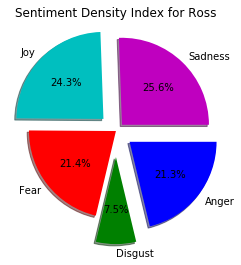

In [44]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Ross, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Ross')
plt.show()


<br />
<center>
    <img src="images/ross.png" width=400 height=100 />
</center>


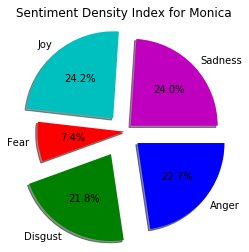

In [45]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Monica, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Monica')
plt.show()

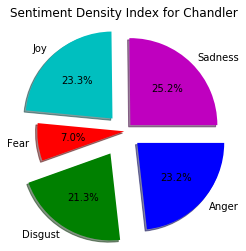

In [46]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Chandler, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Chandler')
plt.show()

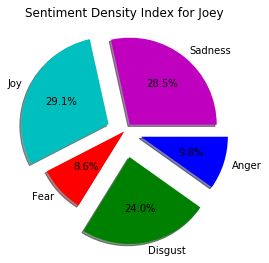

In [47]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Joey, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Joey')
plt.show()

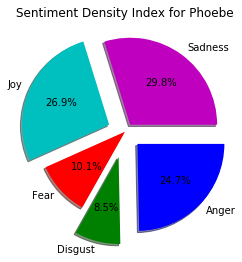

In [48]:
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness']
explode = (0.2, 0.3, 0, 0.2, 0.1)
plt.pie(df.Phoebe, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Sentiment Density Index for Phoebe')
plt.show()

# Wordcloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. 

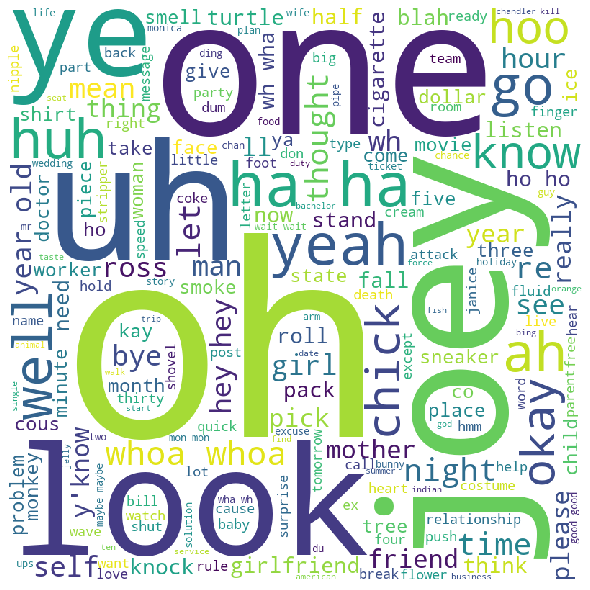

In [49]:
 plotwordcloud(s_chandler)

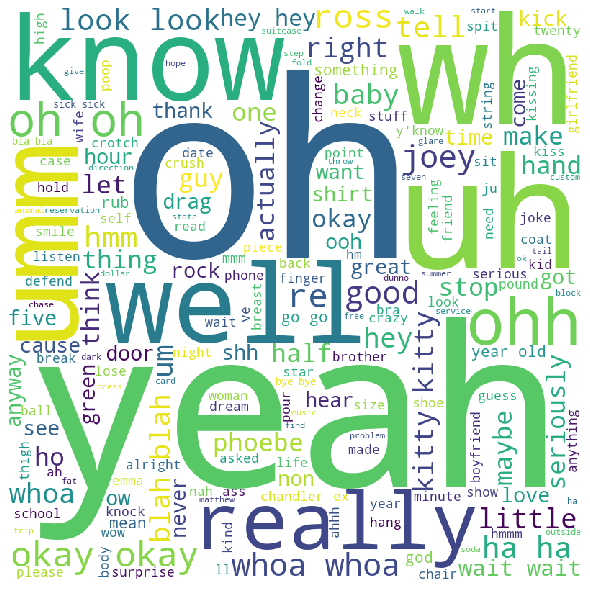

In [50]:
 plotwordcloud(s_rachel)

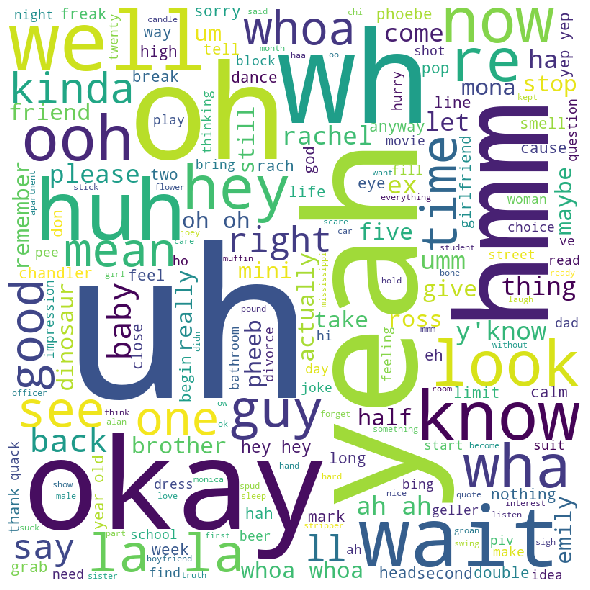

In [51]:
 plotwordcloud(s_ross)

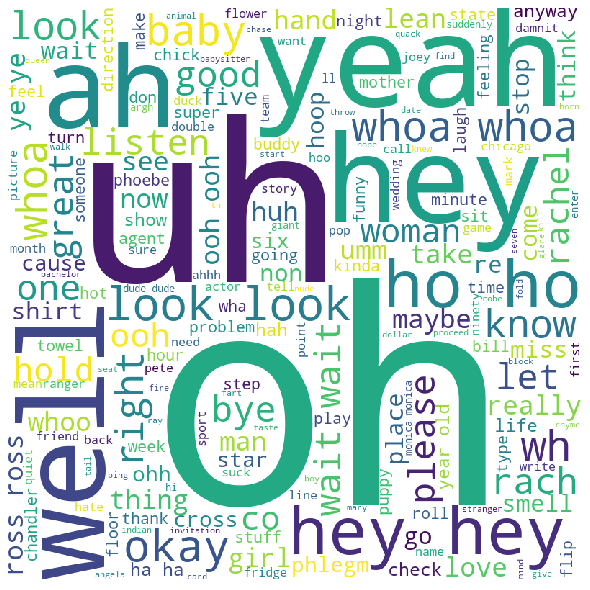

In [52]:
 plotwordcloud(s_joe)

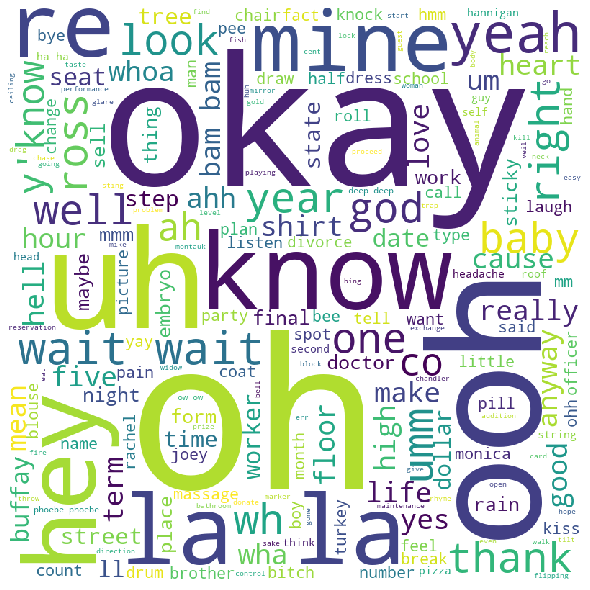

In [53]:
 plotwordcloud(s_phoebs)

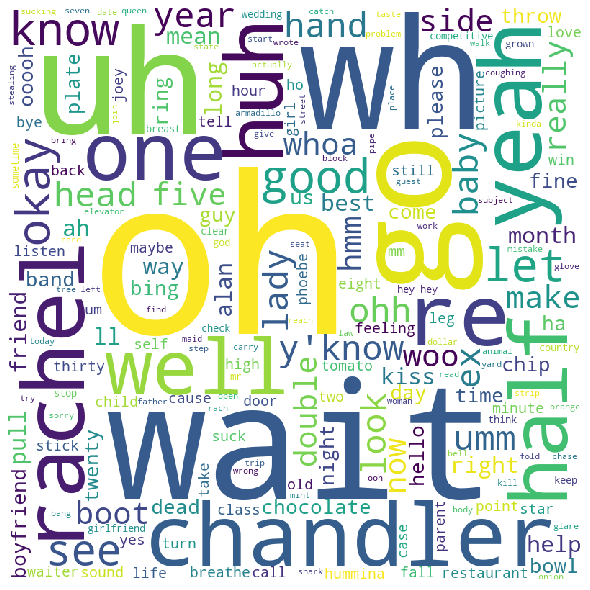

In [54]:
plotwordcloud(s_mon)